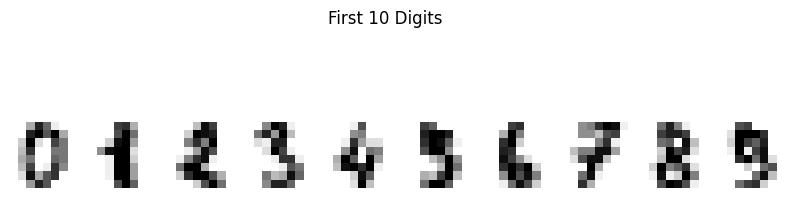

In [1]:
# 데이터 로드 및 시각화
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X, y = digits.data, digits.target

# 처음 10개 이미지 확인
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image in zip(axes, digits.images[0:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
plt.suptitle("First 10 Digits")
plt.show()

In [3]:
# 데이터 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [4]:
# Linear SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred = clf_linear.predict(X_test)

print("Linear SVM Test Accuracy:", accuracy_score(y_test, y_pred))

Linear SVM Test Accuracy: 0.975


In [5]:
# RBF SVM
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred = clf_rbf.predict(X_test)

print("RBF SVM Test Accuracy:", accuracy_score(y_test, y_pred))

RBF SVM Test Accuracy: 0.9805555555555555


In [6]:
# GridSearchCV로 RBF 최적화
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Params (RBF):", grid_search.best_params_)
best_rbf = grid_search.best_estimator_

y_pred = best_rbf.predict(X_test)
print("Optimized RBF Test Accuracy:", accuracy_score(y_test, y_pred))

Best Params (RBF): {'C': 10, 'gamma': 0.01}
Optimized RBF Test Accuracy: 0.9805555555555555


In [7]:
# Sigmoid SVM
clf_sig = SVC(kernel='sigmoid')
clf_sig.fit(X_train, y_train)
y_pred = clf_sig.predict(X_test)

print("Sigmoid SVM Test Accuracy:", accuracy_score(y_test, y_pred))


Sigmoid SVM Test Accuracy: 0.9305555555555556


In [8]:
# GridSearchCV로 Sigmoid SVM 최적화
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(SVC(kernel='sigmoid'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Params (Sigmoid):", grid_search.best_params_)
best_sig = grid_search.best_estimator_

y_pred = best_sig.predict(X_test)
print("Optimized Sigmoid Test Accuracy:", accuracy_score(y_test, y_pred))


Best Params (Sigmoid): {'C': 10, 'gamma': 0.001}
Optimized Sigmoid Test Accuracy: 0.9777777777777777


In [9]:
# Soft Voting 앙상블 (RBF + GradientBoosting)
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

clf_rbf_best = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
clf_rbf_best.fit(X_train, y_train)

gb_clf = GradientBoostingClassifier()

voting_clf = VotingClassifier(
    estimators=[('svm', clf_rbf_best), ('gb', gb_clf)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print("Soft Voting (RBF+GB) Test Accuracy:", accuracy_score(y_test, y_pred))

Soft Voting (RBF+GB) Test Accuracy: 0.9833333333333333


In [10]:
# PCA 적용 후 RBF
from sklearn.decomposition import PCA

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

clf_rbf_pca = SVC(kernel='rbf', C=1, gamma=0.01)
clf_rbf_pca.fit(X_train_pca, y_train)

y_pred = clf_rbf_pca.predict(X_test_pca)
print("RBF + PCA(30차원) Test Accuracy:", accuracy_score(y_test, y_pred))

RBF + PCA(30차원) Test Accuracy: 0.9777777777777777
